# Insurance Data Analysis

Siny P Raphel

* Summarize info of the data
* Investigate why some customers have high charges/low charges


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
insurance = pd.read_csv('data/insurance.csv')
insurance.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [87]:
insurance.children =insurance.children.astype(object)
insurance.dtypes

age           int64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

There are no null values in the datset. Three features are categorical - sex, smoker and region. Rest of the features are numerical. 

In [36]:
insurance.duplicated().sum()

1

There is one duplicate row.

In [37]:
insurance[insurance.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


As we can see even the decimal values for bmi and charges are equal it is an error. So the duplicate can be dropped.

In [39]:
insurance.drop_duplicates(inplace=True)

### Univariate Analysis

In [88]:
cat_features = insurance.columns[insurance.dtypes == object]
num_features = insurance.columns[insurance.dtypes != object]

In [89]:
print(f"Categorical features are {cat_features.to_list()}")
print(f"Numeric features are {num_features.to_list()}")

Categorical features are ['sex', 'children', 'smoker', 'region']
Numeric features are ['age', 'bmi', 'charges']


Let us inspect the categorical variables

In [139]:
for feature in cat_features:
    print(f"========{feature}========")
    print(insurance[feature].value_counts()/ insurance.shape[0])

========sex========
male      0.504862
female    0.495138
Name: sex, dtype: float64
========children========
0    0.428571
1    0.242334
2    0.179506
3    0.117427
4    0.018699
5    0.013463
Name: children, dtype: float64
========smoker========
no     0.795064
yes    0.204936
Name: smoker, dtype: float64
========region========
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64


Now let us inspect numerical features

In [91]:
insurance.describe()

,age,bmi,charges
count,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487
std,14.044333,6.100468,12110.359656
min,18.000000,15.960000,1121.873900
25%,27.000000,26.290000,4746.344000
50%,39.000000,30.400000,9386.161300
75%,51.000000,34.700000,16657.717450
max,64.000000,53.130000,63770.428010


From the initial analysis it is evident that the standard deviation is high for all the features representing an imbalanced numerical features. Let us inspect more on this.

In [92]:
insurance[num_features].skew()

age        0.054781
bmi        0.283914
charges    1.515391
dtype: float64

In [93]:
insurance[num_features].kurtosis()

age       -1.244406
bmi       -0.052947
charges    1.604221
dtype: float64

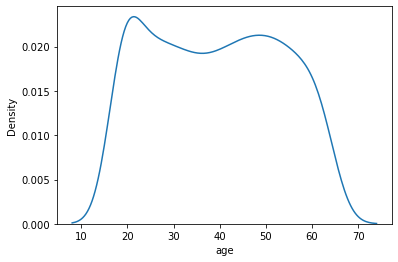

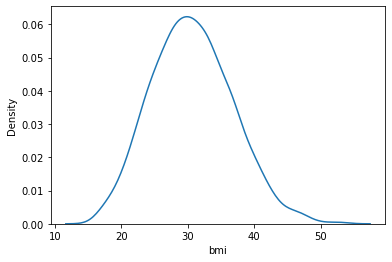

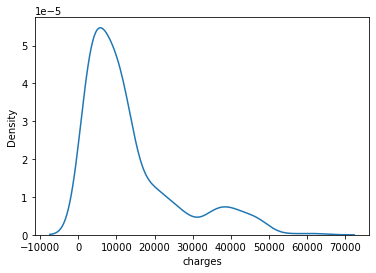

In [94]:
for feature in num_features:
    sns.kdeplot(data=insurance[feature])
    plt.show()

<AxesSubplot:>

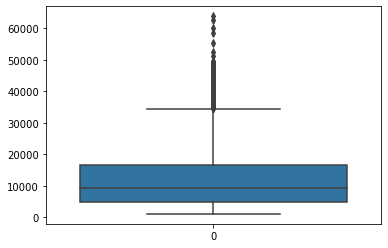

In [106]:
sns.boxplot(data=insurance.charges)

## Bivariate analysis

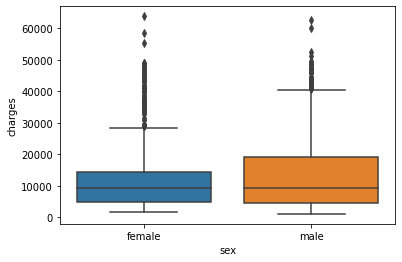

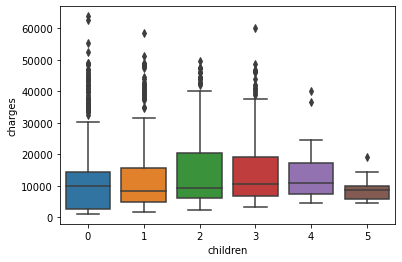

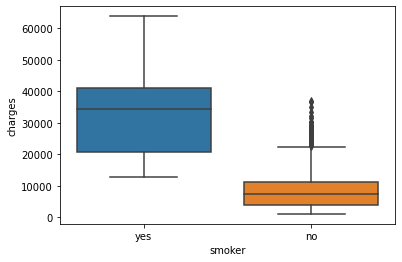

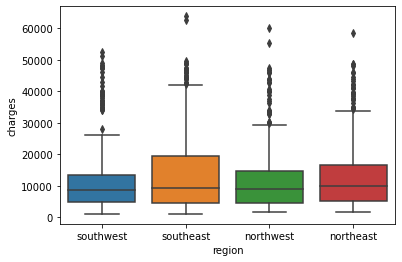

In [118]:
for feature in cat_features:
    sns.boxplot(data=insurance, x=feature, y='charges')
    plt.show()

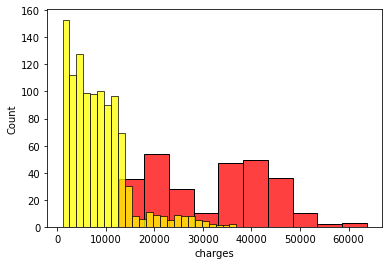

In [119]:
sns.histplot(insurance[insurance.smoker=='yes']['charges'], color='red')
sns.histplot(insurance[insurance.smoker=='no']['charges'], color='yellow')
plt.show()

<AxesSubplot:>

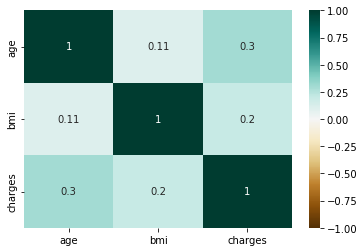

In [95]:
sns.heatmap(data=insurance[num_features].corr(), cmap='BrBG', vmax=1, vmin=-1, annot=True)

In [104]:
insurance.pivot_table(index='children', columns=['region'], values='charges', aggfunc=['min', 'max', 'mean'])

min                                           max  \
region     northeast   northwest  southeast southwest    northeast   
children                                                             
0         1694.79640  1621.34020  1121.8739  1241.565  45710.20785   
1         3167.45585  2221.56445  1711.0268  1832.094  58571.07448   
2         3279.86855  2803.69785  2304.0022  2913.569  44641.19740   
3         3481.86800  4296.27120  4449.4620  3443.064  48549.17835   
4         4561.18850  4877.98105  4504.6624  5708.867  24671.66334   
5         4915.05985  8965.79575  6653.7886  4687.797   9222.40260   

                                                         mean                \
region      northwest    southeast    southwest     northeast     northwest   
children                                                                      
0         55135.40209  63770.42801  52590.82939  11626.462658  11398.300749   
1         43943.87610  48970.24760  51194.55914  16310.206403  10230.256309   
2         47496.49445  49577.66240  47305.30500  13615.152722  13464.314687   
3         60021.39897  46151.12450  27941.28758  14409.913296  17786.160672   
4         21472.47880  36580.28216  40182.24600  14485.193120  11347.018725   
5          8965.79575  14478.33015  19023.26000   6978.973483   8965.795750   

                                      
region       southeast     southwest  
children                              
0         14309.868378  11938.504986  
1         13687.041971  10406.484953  
2         15728.470623  17483.485559  
3         18449.846015  10402.442259  
4         14451.023972  14933.260533  
5         10115.441542   8444.158625

For clients with zero children the charges are very low compared to clients with children. 

Investigate why some customers have high charges/low charges

In [107]:
insu_hl = insurance.copy()


In [108]:
target_desc = insu_hl.charges.describe()
target_desc

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [109]:
insu_hl.drop(index = insu_hl[insu_hl.charges.between(target_desc['25%'], target_desc['75%'])].index, inplace=True)

In [113]:
insu_hl.shape

(668, 7)

In [114]:
insu_hl['hi/low'] = insu_hl.charges.apply(lambda x: 'low' if x<=target_desc['25%'] else 'high')

In [115]:
insu_hl.head(2)

,age,sex,bmi,children,smoker,region,charges,hi/low
0,19,female,27.90,0,yes,southwest,16884.9240,high
1,18,male,33.77,1,no,southeast,1725.5523,low


In [136]:
for feature in cat_features:
    print(f"======{feature}=============")
    print(insu_hl.pivot_table(index='hi/low', values='charges', aggfunc=['count'], columns=[feature]))
    

======sex=============
        count     
sex    female male
hi/low            
high      146  188
low       160  174
======children=============
         count                  
children     0   1   2   3  4  5
hi/low                          
high       129  79  72  46  7  1
low        203  75  38  15  2  1
======smoker=============
        count       
smoker     no    yes
hi/low              
high     80.0  254.0
low     334.0    NaN
======region=============
           count                              
region northeast northwest southeast southwest
hi/low                                        
high          81        74       112        67
low           75        82        97        80


In [146]:
grp = pd.crosstab(index=insu_hl.region, columns=insu_hl.smoker,margins='all' )
grp

smoker,no,yes,All
region,,,
northeast,100,56,156
northwest,102,54,156
southeast,119,90,209
southwest,93,54,147
All,414,254,668


In [152]:
# print(f"No : {grp['no']/grp['All']}")
print(f"{grp['yes']/grp['All']}")

region
northeast    0.358974
northwest    0.346154
southeast    0.430622
southwest    0.367347
All          0.380240
dtype: float64


In [178]:
# Entire data
grp = pd.crosstab(index=insurance.region, columns=insurance.smoker,margins='all' )
# print(f"No : {grp['no']/grp['All']}")
print(f"{grp['yes']/grp['All']}")

region
northeast    0.206790
northwest    0.179012
southeast    0.250000
southwest    0.178462
All          0.204936
dtype: float64


In [131]:
insu_hl[(insu_hl.sex=='female') & (insu_hl.smoker == 'yes') &(insu_hl['hi/low'] == 'low')]

,age,sex,bmi,children,smoker,region,charges,hi/low


In [179]:
insu_hl[(insu_hl['hi/low'] == 'high') ][['children']].value_counts().sort_values(ascending=False)

children
0           129
1            79
2            72
3            46
4             7
5             1
dtype: int64

In [180]:
insu_hl[(insu_hl['hi/low'] == 'low') ][['children']].value_counts().sort_values(ascending=False)

children
0           203
1            75
2            38
3            15
4             2
5             1
dtype: int64

In [173]:
insu_hl[(insu_hl['hi/low'] == 'high') & (insu_hl.smoker == 'no') & (insu_hl.age <= 20)]

,age,sex,bmi,children,smoker,region,charges,hi/low
102,18,female,30.115,0,no,northeast,21344.84670,high
430,19,male,33.100,0,no,southwest,23082.95533,high
516,20,male,35.310,1,no,southeast,27724.28875,high
526,19,female,30.590,2,no,northwest,24059.68019,high
1039,19,male,27.265,2,no,northwest,22493.65964,high
1195,19,female,27.930,3,no,northwest,18838.70366,high


In [171]:
insu_hl[(insu_hl['hi/low'] == 'high') & (insu_hl.smoker == 'no')].pivot_table(index='sex', values=['age', 'bmi'], aggfunc=['min', 'max', 'mean'])

min         max              mean           
       age     bmi age    bmi        age        bmi
sex                                                
female  18  23.210  62  41.91  41.428571  30.937024
male    19  18.715  64  40.28  42.421053  31.479868

In [138]:
for feature in num_features:
    print(f"======{feature}=============")
    print(insu_hl.pivot_table(index='hi/low', values=feature, aggfunc=['min', 'max', 'mean']))
    

======age=============
       min max       mean
       age age        age
hi/low                   
high    18  64  40.221557
low     18  37  23.826347
======bmi=============
           min    max       mean
           bmi    bmi        bmi
hi/low                          
high    17.765  52.58  31.337186
low     15.960  53.13  29.906647
======charges=============
                min          max          mean
            charges      charges       charges
hi/low                                        
high    16776.30405  63770.42801  31151.710338
low      1121.87390   4738.26820   2856.722754


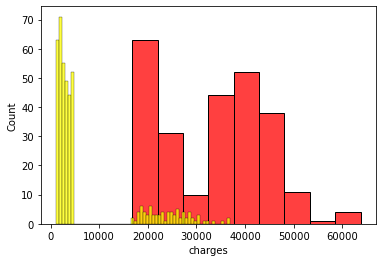

In [121]:
sns.histplot(insu_hl[insu_hl.smoker=='yes']['charges'], color='red')
sns.histplot(insu_hl[insu_hl.smoker=='no']['charges'], color='yellow')
plt.show()

In [194]:
insurance.nlargest(2, columns='age')

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.7,1,no,northwest,30166.61817
94,64,female,31.3,2,yes,southwest,47291.05500


In [191]:
insurance.apply(lambda x: x+0)

TypeError: can only concatenate str (not "int") to str